In [113]:
import sys
!{sys.executable} -m pip install scikit-learn

  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 15.3 MB/s  0:00:00 eta 0:00:01
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [scikit-learn] [scikit-learn]


# Задание 1

## 1.

In [13]:
import numpy as np
import pandas as pd

m = 1
s = 1

arr = np.random.normal(m, s, 1000)
data = pd.Series(arr)

## 2.

In [14]:
data_slice = data[(data > m-s) & (data < m+s)]
print("доля значений находящихся между m-s и m+s:", len(data_slice)/ len(data))

доля значений находящихся между m-s и m+s: 0.664


## 3.

In [15]:
data_slice2 = data[(data > m-3*s) & (data < m+3*s)]
print("доля значений находящихся между m-3s и m+3s:", len(data_slice2)/ len(data))

доля значений находящихся между m-3s и m+3s: 0.998


Теоретическая доля рассчитывается по правилу трех сигм: \
99.73% значений лежат в пределах M ± 3s

Результаты практически соответствуют расчетам

## 4.

In [17]:
sqrt_data = data.apply(np.sqrt)
print(sqrt_data)

0           NaN
1      1.491012
2      0.951544
3      0.719270
4      0.704186
         ...   
995    0.975172
996    1.389535
997    0.991824
998    1.398158
999    1.246635
Length: 1000, dtype: float64


Предупреждений не возникло, но подразумевалось то, что некоторые значения отрицательные, и они стали NaN

# 5.

In [20]:
sqrt_data.mean(skipna=True)

np.float64(1.0780383572712902)

## 6-7.

In [24]:
df = pd.DataFrame({
    "number" : data,
    "root" : sqrt_data
})

print("Первые 6 значений нового датафрейма")
print(df.head(6))

print("занчения в диапазоне от 1.8 и 1.9")
print(df.query("root >= 1.8 and root <=1.9"))

Первые 6 значений нового датафрейма
     number      root
0 -0.360012       NaN
1  2.223116  1.491012
2  0.905435  0.951544
3  0.517349  0.719270
4  0.495878  0.704186
5 -0.428529       NaN
занчения в диапазоне от 1.8 и 1.9
       number      root
72   3.553155  1.884982
222  3.259763  1.805481
413  3.320879  1.822328
418  3.460054  1.860122
467  3.526659  1.877940
617  3.595689  1.896230
647  3.252338  1.803424


# Задание 2

In [53]:
athlete_df = pd.read_csv("athlete_events.csv")
print(athlete_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB
None


не все данные у: Age, Height, Weight, Medal \
больше всего данных отсутствует у Medal

In [27]:
print(athlete_df.describe())

                  ID            Age         Height         Weight  \
count  271116.000000  261642.000000  210945.000000  208241.000000   
mean    68248.954396      25.556898     175.338970      70.702393   
std     39022.286345       6.393561      10.518462      14.348020   
min         1.000000      10.000000     127.000000      25.000000   
25%     34643.000000      21.000000     168.000000      60.000000   
50%     68205.000000      24.000000     175.000000      70.000000   
75%    102097.250000      28.000000     183.000000      79.000000   
max    135571.000000      97.000000     226.000000     214.000000   

                Year  
count  271116.000000  
mean     1978.378480  
std        29.877632  
min      1896.000000  
25%      1960.000000  
50%      1988.000000  
75%      2002.000000  
max      2016.000000  


## 4.1

In [41]:
min_age = athlete_df[athlete_df["Year"] == 1992]["Age"].min()
print(athlete_df[(athlete_df["Age"] == 11) & (athlete_df["Year"] == 1992)])

          ID                             Name Sex   Age  Height  Weight  \
73461  37333  Carlos Bienvenido Front Barrera   M  11.0     NaN     NaN   

        Team  NOC        Games  Year  Season       City   Sport  \
73461  Spain  ESP  1992 Summer  1992  Summer  Barcelona  Rowing   

                           Event Medal  
73461  Rowing Men's Coxed Eights   NaN  


## 4.2

In [42]:
print(athlete_df["Sport"].unique())

['Basketball' 'Judo' 'Football' 'Tug-Of-War' 'Speed Skating'
 'Cross Country Skiing' 'Athletics' 'Ice Hockey' 'Swimming' 'Badminton'
 'Sailing' 'Biathlon' 'Gymnastics' 'Art Competitions' 'Alpine Skiing'
 'Handball' 'Weightlifting' 'Wrestling' 'Luge' 'Water Polo' 'Hockey'
 'Rowing' 'Bobsleigh' 'Fencing' 'Equestrianism' 'Shooting' 'Boxing'
 'Taekwondo' 'Cycling' 'Diving' 'Canoeing' 'Tennis' 'Modern Pentathlon'
 'Figure Skating' 'Golf' 'Softball' 'Archery' 'Volleyball'
 'Synchronized Swimming' 'Table Tennis' 'Nordic Combined' 'Baseball'
 'Rhythmic Gymnastics' 'Freestyle Skiing' 'Rugby Sevens' 'Trampolining'
 'Beach Volleyball' 'Triathlon' 'Ski Jumping' 'Curling' 'Snowboarding'
 'Rugby' 'Short Track Speed Skating' 'Skeleton' 'Lacrosse' 'Polo'
 'Cricket' 'Racquets' 'Motorboating' 'Military Ski Patrol' 'Croquet'
 'Jeu De Paume' 'Roque' 'Alpinism' 'Basque Pelota' 'Aeronautics']


## 4.3

In [51]:
print(athlete_df[(athlete_df["Sport"] == "Tennis") & (athlete_df["Year"] == 2000) & (athlete_df["Sex"] == "F")]["Height"].mean())

171.792


## 4.4

In [57]:
print(athlete_df[(athlete_df["Sport"] == "Table Tennis") & (athlete_df["Year"] == 2008) & (athlete_df["Medal"] == "Gold")& (athlete_df["Team"] == "China")]["Medal"].count())

8


## 4.5

In [58]:
print(len(athlete_df[athlete_df["Year"] == 2004]["Sport"].unique()) - len(athlete_df[athlete_df["Year"] == 1988]["Sport"].unique()))

-3


## 4.6

<Axes: >

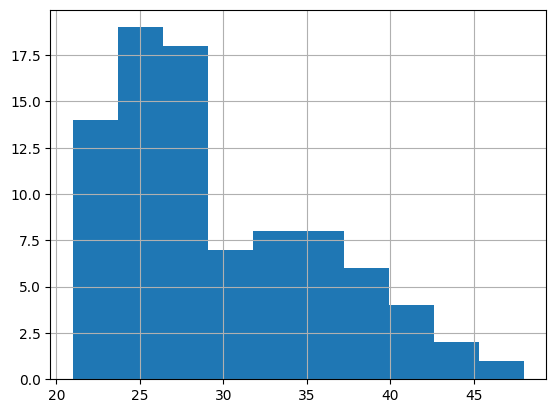

In [61]:

athlete_df[(athlete_df["Sport"] == "Curling") & (athlete_df["Year"] == 2014)]["Age"].hist()

## 4.7

In [72]:
print(athlete_df[athlete_df["Year"] == 2006].groupby("NOC")["Age"].agg("mean"))
result = athlete_df[athlete_df["Year"] == 2006].groupby("NOC").agg(medal=("Medal", "count"), age=("Age", "mean"))
print(result[result["medal"] > 0])

NOC
ALB    19.000000
ALG    24.333333
AND    24.800000
ARG    23.764706
ARM    21.666667
         ...    
TUR    20.941176
UKR    25.614679
USA    25.818462
UZB    22.750000
VEN    52.000000
Name: Age, Length: 79, dtype: float64
     medal        age
NOC                  
AUS      2  25.711111
AUT     30  27.704545
BLR      1  27.142857
BUL      1  26.181818
CAN     69  25.481967
CHN     13  23.534247
CRO      3  22.760870
CZE     27  26.276471
EST      3  25.634921
FIN     41  26.614286
FRA     15  26.283019
GBR      1  26.851852
GER     54  27.376426
ITA     25  26.727586
JPN      1  26.515789
KOR     19  21.564706
LAT      1  26.380435
NED     13  25.873016
NOR     23  28.186335
POL      2  25.219780
RUS     41  25.784452
SUI     21  26.475138
SVK      1  25.517544
SWE     64  26.791667
UKR      3  25.614679
USA     52  25.818462


## 4.8

In [78]:
athlete_df[(athlete_df["Year"] == 2006) & (athlete_df["Medal"].notna())].pivot_table(values="ID", columns="Medal", index="NOC", aggfunc="count", fill_value=0)

Medal,Bronze,Gold,Silver
NOC,,,
AUS,1,1,0
AUT,7,16,7
BLR,0,0,1
BUL,0,0,1
CAN,11,30,28
CHN,6,2,5
CRO,0,1,2
CZE,24,1,2
EST,0,3,0


# Задание 3

## 1

In [79]:
telecom_df = pd.read_csv("telecom_churn.csv")

telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

## 2

In [93]:
print(telecom_df["Churn"].value_counts())
lost = telecom_df["Churn"].value_counts()[True]
active = telecom_df["Churn"].value_counts()[False]
print("процент потерянных:", lost/(lost+active) * 100)
print("процент активных:", active/(lost+active) * 100)

Churn
False    2850
True      483
Name: count, dtype: int64
процент потерянных: 14.491449144914492
процент активных: 85.5085508550855


## 3

In [98]:
telecom_df["avg_min"] = (telecom_df["Total day minutes"] + telecom_df["Total eve minutes"] + telecom_df["Total night minutes"]) / (telecom_df["Total day calls"] + telecom_df["Total eve calls"] + telecom_df["Total night calls"])
telecom_df["avg_min"].sort_values(ascending=False).head(10)

985     3.693644
2824    3.599519
244     3.509402
2321    3.429258
2033    3.351121
1709    3.347872
2536    3.325806
1686    3.222624
649     3.197368
2289    3.181498
Name: avg_min, dtype: float64

## 4

In [99]:
telecom_df.groupby("Churn")["avg_min"].mean()

Churn
False    1.938102
True     2.091193
Name: avg_min, dtype: float64

## 5

In [103]:
telecom_df.groupby("Churn")["Customer service calls"].mean()

Churn
False    1.449825
True     2.229814
Name: Customer service calls, dtype: float64

## 6

In [108]:
cross_tab = pd.crosstab(
    telecom_df['Customer service calls'], 
    telecom_df['Churn'],
)

print("Таблица сопряженности:")
print(cross_tab)

cross_tab['Churn Rate (%)'] = (cross_tab[True] / (cross_tab[False] + cross_tab[True])) * 100
cross_tab['Churn Rate (%)'] = cross_tab['Churn Rate (%)'].round(2)

print("\nТаблица с процентами оттока:")
print(cross_tab[[False, True, 'Churn Rate (%)']])

total_churn_rate = (telecom_df['Churn'].sum() / len(telecom_df)) * 100
print(f"\nОбщий процент оттока по датафрейму: {total_churn_rate:.2f}%")

Таблица сопряженности:
Churn                   False  True 
Customer service calls              
0                         605     92
1                        1059    122
2                         672     87
3                         385     44
4                          90     76
5                          26     40
6                           8     14
7                           4      5
8                           1      1
9                           0      2

Таблица с процентами оттока:
Churn                   False  True  Churn Rate (%)
Customer service calls                             
0                         605    92           13.20
1                        1059   122           10.33
2                         672    87           11.46
3                         385    44           10.26
4                          90    76           45.78
5                          26    40           60.61
6                           8    14           63.64
7                           4     5

## 7

In [111]:
cross_tab = pd.crosstab(
    telecom_df['International plan'], 
    telecom_df['Churn'],
)

cross_tab['Churn Rate (%)'] = (cross_tab[True] / (cross_tab[False] + cross_tab[True])) * 100
cross_tab['Churn Rate (%)'] = cross_tab['Churn Rate (%)'].round(2)

print("\nТаблица с процентами оттока:")
print(cross_tab[[False, True, 'Churn Rate (%)']])


Таблица с процентами оттока:
Churn               False  True  Churn Rate (%)
International plan                             
No                   2664   346           11.50
Yes                   186   137           42.41


## 8

In [115]:
telecom_df['pred_churn'] = (
    (telecom_df['Customer service calls'] > 3) |
    (telecom_df['International plan'] == 'Yes') 
)

from sklearn.metrics import confusion_matrix
import numpy as np

cm = confusion_matrix(telecom_df['Churn'], telecom_df['pred_churn'])

tn, fp, fn, tp = cm.ravel()

print("Матрица ошибок:")
print(f"True Negative (TN): {tn} - правильно предсказано отсутствие оттока")
print(f"False Positive (FP): {fp} - ложноположительные (ошибка 1 рода)")
print(f"False Negative (FN): {fn} - ложноотрицательные (ошибка 2 рода)")
print(f"True Positive (TP): {tp} - правильно предсказанный отток")

Матрица ошибок:
True Negative (TN): 2544 - правильно предсказано отсутствие оттока
False Positive (FP): 306 - ложноположительные (ошибка 1 рода)
False Negative (FN): 227 - ложноотрицательные (ошибка 2 рода)
True Positive (TP): 256 - правильно предсказанный отток
